# Import packages and datasets

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
sales_train_val = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sales_train_validation.csv')

# Filter test data

In [19]:
sales_train_val

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,2,0,0,0,0,0,1,0,0,1
30486,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
30487,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,2,1,0,2,0,1,0,0,1,0
30488,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,1,0,0,1,0,3,1,3


In [20]:
list_cols_drop = ['d_{0}'.format(i) for i in range(1900, 1914)]

In [21]:
sales_train_val = sales_train_val.drop(columns=list_cols_drop)

In [22]:
sales_train_val

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,1,0,4,2,3,0,1,2
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,3,1,2,1,3,1,0,2,5,4
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,4,0,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,0,0,0,0,0,0,0,0,0,0
30486,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,1,1,2,0,0,0,0,1,1
30487,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,0,1,1,2,1,4,0,0,2,2
30488,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,1,1,2,1,1,1,1,2


# Get sales data of Foods in California stores

In [23]:
df_ca_foods = sales_train_val[(sales_train_val['state_id'] == 'CA') & (sales_train_val['cat_id'] == 'FOODS')]

In [24]:
df_ca_category = df_ca_foods.copy()

df_ca_category.drop(['item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'], axis = 1, inplace=True)
df_ca_category = pd.melt(df_ca_category, id_vars=['id'])
df_ca_category['Date'] = df_ca_category['variable'].str[2:].astype('int')

dict_date = {}
for i in range(1, 1914):
    dict_date.update({i: (pd.to_datetime('28/01/2011', format='%d/%m/%Y') + pd.to_timedelta(i, unit='D'))})
    
df_ca_category['Date'] = df_ca_category['Date'].map(dict_date)

df_ca_category = df_ca_category[['Date', 'id', 'value']]

In [25]:
df_ca_category

,Date,id,value
0,2011-01-29,FOODS_1_001_CA_1_validation,3
1,2011-01-29,FOODS_1_002_CA_1_validation,0
2,2011-01-29,FOODS_1_003_CA_1_validation,0
3,2011-01-29,FOODS_1_004_CA_1_validation,0
4,2011-01-29,FOODS_1_005_CA_1_validation,3
...,...,...,...
10915447,2016-04-10,FOODS_3_823_CA_4_validation,0
10915448,2016-04-10,FOODS_3_824_CA_4_validation,0
10915449,2016-04-10,FOODS_3_825_CA_4_validation,0
10915450,2016-04-10,FOODS_3_826_CA_4_validation,2


# Coefficient of Variance Squared (CV2)

In [26]:
df_ca_category_1 = df_ca_category[df_ca_category['value'] != 0]

In [27]:
cv_data = df_ca_category_1.groupby('id').agg(average=('value','mean'),
                                 sd=('value','std')).reset_index()

cv_data['cv_sqr'] = (cv_data['sd'] / cv_data['average'])**2

In [28]:
cv_data

,id,average,sd,cv_sqr
0,FOODS_1_001_CA_1_validation,1.802663,1.345175,0.556837
1,FOODS_1_001_CA_2_validation,2.227088,1.859587,0.697201
2,FOODS_1_001_CA_3_validation,2.671729,2.865148,1.150030
3,FOODS_1_001_CA_4_validation,1.393878,0.781930,0.314693
4,FOODS_1_002_CA_1_validation,1.439490,0.750014,0.271470
...,...,...,...,...
5743,FOODS_3_826_CA_4_validation,2.232673,1.386006,0.385372
5744,FOODS_3_827_CA_1_validation,4.338323,3.294718,0.576757
5745,FOODS_3_827_CA_2_validation,3.577947,3.539392,0.978565
5746,FOODS_3_827_CA_3_validation,5.435730,6.126906,1.270477


# Average Demand Interval (ADI) per Product

In [29]:
prod_by_date = df_ca_category_1.groupby(['id','Date']).agg(count=('id','count')).reset_index()
skus = prod_by_date.id.value_counts()

In [30]:
from timeit import default_timer as timer
start = timer()

list_adi = list()
for i in range(len(skus.index)):
    a = prod_by_date[prod_by_date['id']==skus.index[i]]
    a['Previous_Date'] = a['Date'].shift(1)
    a['Duration'] = (a['Date'] - a['Previous_Date']).dt.days
    mean_temp = a.Duration.mean()
    list_adi.append([skus.index[i], mean_temp])

end = timer()
print('This line of code took {} minutes'.format((end-start) / 60))

This line of code took 23.209865457750002 minutes


In [31]:
list_adi[:5]

[['FOODS_3_586_CA_2_validation', 1.0015831134564643],
 ['FOODS_3_555_CA_3_validation', 1.0021119324181627],
 ['FOODS_3_080_CA_3_validation', 1.0026413100898046],
 ['FOODS_3_586_CA_3_validation', 1.0026413100898046],
 ['FOODS_3_080_CA_2_validation', 1.0026413100898046]]

In [32]:
ADI_df = pd.DataFrame(list_adi, columns=['id', 'ADI'])

In [35]:
ADI_df

,id,ADI
0,FOODS_3_586_CA_2_validation,1.001583
1,FOODS_3_555_CA_3_validation,1.002112
2,FOODS_3_080_CA_3_validation,1.002641
3,FOODS_3_586_CA_3_validation,1.002641
4,FOODS_3_080_CA_2_validation,1.002641
...,...,...
5743,FOODS_2_337_CA_2_validation,12.000000
5744,FOODS_1_079_CA_2_validation,79.789474
5745,FOODS_2_005_CA_2_validation,58.000000
5746,FOODS_2_117_CA_4_validation,7.214286


# MERGE CV2 AND ADI DATA

In [36]:
adi_cv = pd.merge(cv_data, ADI_df, on = 'id', how = 'inner')

In [37]:
adi_cv.isnull().sum()

id         0
average    0
sd         0
cv_sqr     0
ADI        0
dtype: int64

In [39]:
adi_cv

,id,average,sd,cv_sqr,ADI
0,FOODS_1_001_CA_1_validation,1.802663,1.345175,0.556837,2.300606
1,FOODS_1_001_CA_2_validation,2.227088,1.859587,0.697201,1.930683
2,FOODS_1_001_CA_3_validation,2.671729,2.865148,1.150030,2.219883
3,FOODS_1_001_CA_4_validation,1.393878,0.781930,0.314693,3.871166
4,FOODS_1_002_CA_1_validation,1.439490,0.750014,0.271470,3.019139
...,...,...,...,...,...
5743,FOODS_3_826_CA_4_validation,2.232673,1.386006,0.385372,1.345725
5744,FOODS_3_827_CA_1_validation,4.338323,3.294718,0.576757,1.225225
5745,FOODS_3_827_CA_2_validation,3.577947,3.539392,0.978565,2.015267
5746,FOODS_3_827_CA_3_validation,5.435730,6.126906,1.270477,1.609170


In [40]:
adi_cv.to_csv('ADI_CV_5_Year.csv')

In [41]:
def category(df):
    a=0

    if((df['ADI']<=1.32) & (df['cv_sqr']<=0.49)):
        a='Smooth'
    if((df['ADI']>=1.32) & (df['cv_sqr']>=0.49)):  
        a='Lumpy'
    if((df['ADI']<1.32) & (df['cv_sqr']>0.49)):
        a='Erratic'
    if((df['ADI']>1.32) & (df['cv_sqr']<0.49)):
        a='Intermittent'
    return a

In [42]:
adi_cv['category']=adi_cv.apply(category,axis=1)

In [43]:
adi_cv

,id,average,sd,cv_sqr,ADI,category
0,FOODS_1_001_CA_1_validation,1.802663,1.345175,0.556837,2.300606,Lumpy
1,FOODS_1_001_CA_2_validation,2.227088,1.859587,0.697201,1.930683,Lumpy
2,FOODS_1_001_CA_3_validation,2.671729,2.865148,1.150030,2.219883,Lumpy
3,FOODS_1_001_CA_4_validation,1.393878,0.781930,0.314693,3.871166,Intermittent
4,FOODS_1_002_CA_1_validation,1.439490,0.750014,0.271470,3.019139,Intermittent
...,...,...,...,...,...,...
5743,FOODS_3_826_CA_4_validation,2.232673,1.386006,0.385372,1.345725,Intermittent
5744,FOODS_3_827_CA_1_validation,4.338323,3.294718,0.576757,1.225225,Erratic
5745,FOODS_3_827_CA_2_validation,3.577947,3.539392,0.978565,2.015267,Lumpy
5746,FOODS_3_827_CA_3_validation,5.435730,6.126906,1.270477,1.609170,Lumpy


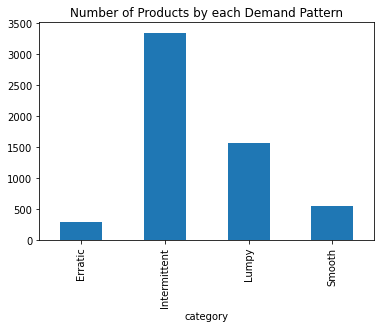

In [45]:
adi_cv.groupby('category')['id'].count().plot(kind='bar')
plt.title('Number of Products by each Demand Pattern')
plt.show()

In [46]:
list_intermittent = adi_cv[adi_cv['category'] == 'Intermittent']['id'].unique().tolist()
list_lumpy = adi_cv[adi_cv['category'] == 'Lumpy']['id'].unique().tolist()
list_smooth = adi_cv[adi_cv['category'] == 'Smooth']['id'].unique().tolist()
list_erratic = adi_cv[adi_cv['category'] == 'Erratic']['id'].unique().tolist()

In [47]:
pd.Series(list_intermittent).to_csv('Intermittent_ID_5_Year_Data.csv')
pd.Series(list_lumpy).to_csv('Lumpy_ID_5_Year_Data.csv')
pd.Series(list_smooth).to_csv('Smooth_ID_5_Year_Data.csv')
pd.Series(list_erratic).to_csv('Erratic_ID_5_Year_Data.csv')